In [97]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

# **Reticolo B1**

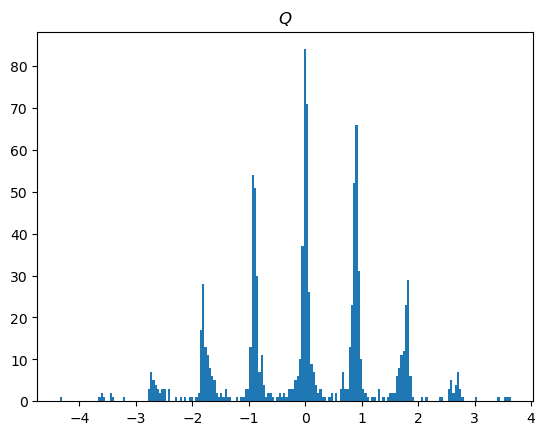

In [98]:
Q_12_280 = np.loadtxt('Q_12_280.out')
Qsquare_12_280=np.mean(Q_12_280**2) #calcolo <Q2>
Qsquare_12_280_err=np.std(Q_12_280**2)/sqrt(len(Q_12_280))
plt.hist(Q_12_280, bins=200)
plt.title(r'$Q$')
plt.show()


In [99]:
Qsquare_12=Qsquare_12_280
Qsquare_12_err=Qsquare_12_280_err
print('<Q2> =', Qsquare_12, '±', Qsquare_12_err)

<Q2> = 1.6109668510028254 ± 0.07202329755750297


In [100]:
t0a2_12=2.7984
t0a2_12_err=0.0009
chi_12=t0a2_12**2*Qsquare_12/12**4
chi_12_err=sqrt(t0a2_12**4*Qsquare_12_err**2+4*t0a2_12**2*Qsquare_12**2*t0a2_12_err**2)/12**4 #formulazza schifosa prop errori

# **Reticolo B2**

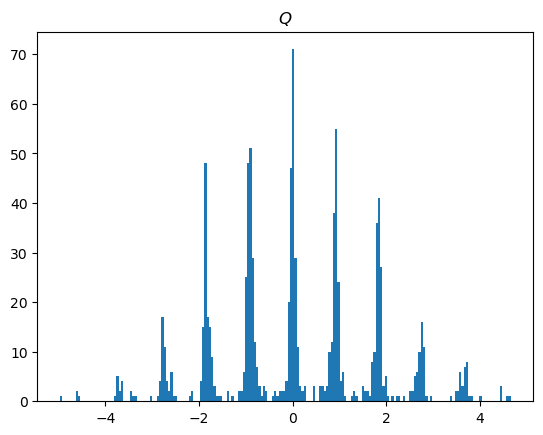

In [101]:
Q_16b_350 = np.loadtxt('1_16b_350.out')
Qsquare_16b_350=np.mean(Q_16b_350**2) #calcolo <Q2>  
Qsquare_16b_350_err=np.std(Q_16b_350**2)/sqrt(len(Q_16b_350)) #calcolo errore
plt.hist(Q_16b_350, bins=200)
plt.title(r'$Q$')
plt.show()



In [102]:
Q_16b_400 = np.loadtxt('1_16b_400.out')
Qsquare_16b_400=np.mean(Q_16b_400**2) #calcolo <Q2>
Qsquare_16b_400_err=np.std(Q_16b_350**2)/sqrt(len(Q_16b_400)) #calcolo errore


In [103]:
Qsquare_16b=np.mean([Qsquare_16b_350, Qsquare_16b_400])
Qsquare_16b_err=sqrt(Qsquare_16b_350_err**2+Qsquare_16b_400_err**2)/2
Qsquare_16b_err*(14/16)**4
print('<Q2> =', Qsquare_16b, '±', Qsquare_16b_err)


<Q2> = 2.8378996112939143 ± 0.08442919771657215


In [104]:
t0a2_16b=3.7960
t0a2_16b_err=0.0012
chi_16b=t0a2_16b**2*Qsquare_16b/16**4
chi_16b_err=sqrt(t0a2_16b**4*Qsquare_16b_err**2+4*t0a2_16b**2*Qsquare_16b**2*t0a2_16b_err**2)/16**4 #formulazza schifosa prop errori



# **Reticolo B3**

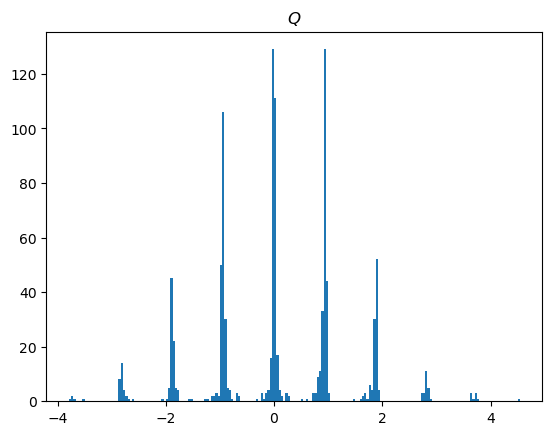

In [105]:
Q_16_480 = np.loadtxt('1_16_480.out')
Qsquare_16_480=np.mean(Q_16_480**2) #calcolo <Q2>
Qsquare_16_480_err=np.std(Q_16_480**2)/sqrt(len(Q_16_480)) #calcolo errore
plt.hist(Q_16_480, bins=200)
plt.title(r'$Q$')
plt.show()

In [106]:
Qsquare_16=Qsquare_16_480
Qsquare_16_err=Qsquare_16_480_err
print('<Q2> =', Qsquare_16, '±', Qsquare_16_err)

<Q2> = 1.661592629564441 ± 0.07741372489834612


In [107]:
t0a2_16=4.8855
t0a2_16_err=0.0015
chi_16=t0a2_16**2*Qsquare_16/16**4
chi_16_err=sqrt(t0a2_16**4*Qsquare_16_err**2+4*t0a2_16**2*Qsquare_16**2*t0a2_16_err**2)/16**4 #formulazza schifosa prop errori


# **Estrapolazione al continuo**

In [108]:
from scipy.optimize import curve_fit
def lin(x, m, q):
    return x*m+q

In [109]:
x=np.array([1/t0a2_12, 1/t0a2_16b, 1/t0a2_16])
y=np.array([chi_12, chi_16b, chi_16])
sigma_y=np.array([chi_12_err, chi_16b_err, chi_16_err])
par, cov= curve_fit(lin, x, y, sigma=sigma_y, absolute_sigma=True)
print(y)
y_predetti = lin(x, *par)
chi_quadro = np.sum(((y - y_predetti) / sigma_y)**2)
d=len(x)-len(par)
chi_quadro=chi_quadro/d
print('chiquadro ',chi_quadro)

[0.00060839 0.00062398 0.00060515]
chiquadro  0.40932975341060873


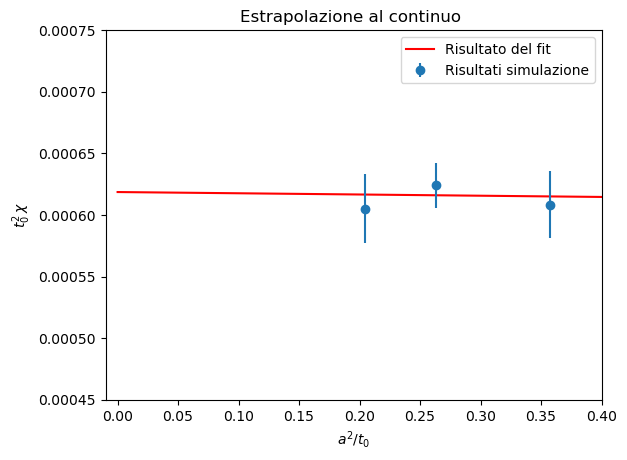

[0.35734706 0.26343519 0.20468734]


In [110]:
xplot=np.linspace(0, 0.4, num=100000)
plt.plot(xplot, par[0] * xplot + par[1], 'r', label='Risultato del fit')
plt.errorbar(x, y, yerr=sigma_y, fmt='o', label='Risultati simulazione')
plt.xlim(0-0.01, 0.4)
plt.ylim(0.00045,0.00075)
plt.xlabel(r'$a^2/t_0$')
plt.ylabel(r'$t_0^2\,\chi$')
plt.title('Estrapolazione al continuo ')
plt.legend()
plt.show()
print(x)


In [111]:
t02chi_continuo=par[1]
t02chi_continuo_err=sqrt(cov[1][1])
print('t0^2 chi_continuo =', t02chi_continuo, '±', t02chi_continuo_err)

t0^2 chi_continuo = 0.0006185701031123223 ± 7.01121736229365e-05


In [112]:
sqrtt0=0.176
sqrtt0_err=0.004
t0squareinv=sqrtt0**(-4)
t0squareinv_err=4*sqrtt0**(-5)*sqrtt0_err
chi_continuo=t02chi_continuo*t0squareinv #è in fermi alla -4
chi_continuo_errstat=t02chi_continuo_err*t0squareinv
chi_continuo_errsist=t02chi_continuo*t0squareinv_err
hbarc=197.3269804
chi_continuo_pu=chi_continuo*hbarc**4
chi_continuo_pu_errstat=chi_continuo_errstat*hbarc**4
chi_continuo_pu_errsist=chi_continuo_errsist*hbarc**4
print('chi=', chi_continuo_pu**(1/4), '±', 0.25*chi_continuo_pu**(-3/4)*chi_continuo_pu_errstat, '±', 0.25*chi_continuo_pu**(-3/4)*chi_continuo_pu_errsist)
F=94 #MeV
Nf=3 
m_k=497.648
m_eta= 547.853
m=sqrt(2*Nf/F**2*chi_continuo_pu+2*m_k**2-m_eta**2)
m_err=Nf*chi_continuo_pu_errstat/(m*F**2)
print('m=', m, ' +- ', m_err)

chi= 176.81578511146049 ± 5.010320965495913 ± 4.018540570715011
m= 926.7557213430823  +-  40.58718324962378


# **Autocorrelazione**